<a href="https://colab.research.google.com/github/ejrtks1020/Deep_learning_basic/blob/main/_8_%EC%98%A4%EC%B0%A8%EC%97%AD%EC%A0%84%ED%8C%8C_(Backpropagation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 오차역전파 (Backpropagation)


### 오차역전파 알고리즘
- 학습 데이터로 정방향(forward) 연산을 통해 손실함수 값(loss)을 구함

- 각 layer별로 역전파학습을 위해 중간값을 저장

- 손실함수를 학습 파라미터(가중치, 편향)로 미분하여  
  마지막 layer로부터 앞으로 하나씩 연쇄법칙을 이용하여 미분
  각 layer를 통과할 때마다 저장된 값을 이용

- 오류(error)를 전달하면서 학습 파라미터를 조금씩 갱신


### 오차역전파 학습의 특징
- 손실함수를 통한 평가를 한 번만 하고, 연쇄법칙을 이용한 미분을 활용하기 때문에  
  학습 소요시간이 매우 단축!

- 미분을 위한 중간값을 모두 저장하기 때문에 메모리를 많이 사용


### 신경망 학습에 있어서 미분가능의 중요성
- 경사하강법(Gradient Descent)에서 손실 함수(cost function)의 최소값,  
  즉, 최적값을 찾기 위한 방법으로 미분을 활용

- 미분을 통해 손실 함수의 학습 매개변수(trainable parameter)를 갱신하여  
  모델의 가중치의 최적값을 찾는 과정

![](https://i.pinimg.com/originals/5d/13/20/5d1320c7b672710834e63b95a7c1037b.png)

<sub>출처: https://www.pinterest.co.kr/pin/424816177350692379/</sub>

### 합성함수의 미분 (연쇄법칙, chain rule)

## $\qquad \frac{d}{dx} [f(g(x))] = f^\prime(g(x))g^\prime(x)$  
 

- 여러 개 연속으로 사용가능  
  ## $ \quad \frac{\partial f}{\partial x} = \frac{\partial f}{\partial u} \times \frac{\partial u}{\partial m} \times \frac{\partial m}{\partial n} \times \ ... \ \frac{\partial l}{\partial k} \times \frac{\partial k}{\partial g} \times \frac{\partial g}{\partial x} 
  $
- 각각에 대해 편미분 적용가능

![](https://cdn-media-1.freecodecamp.org/images/1*_KMMFvRP5X9kC59brI0ykw.png)
<sub>출처: https://www.freecodecamp.org/news/demystifying-gradient-descent-and-backpropagation-via-logistic-regression-based-image-classification-9b5526c2ed46/</sub>

- **오차역전파의 직관적 이해**
  - 학습을 진행하면서, 즉 손실함수의 최소값(minimum)을 찾아가는 과정에서 가중치 또는 편향의 변화에 따라 얼마나 영향을 받는지 알 수 있음



#### 합성함수 미분(chain rule) 예제

![](https://miro.medium.com/max/1000/1*azqHvbrNsZ8AIZ7H75tbIQ.jpeg)

<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

  #### $\quad a=-1, \ b=3, \ c=4$,
  #### $\quad x = a + b, \ y = b + c, \ f = x * y \ 일 때$    



  ### $\quad \begin{matrix}\frac{\partial f}{\partial x} &=& y\ + \ x \ \frac{\partial y}{\partial x} \\
  &=& (b \ + \ c) \ + \ (a \ +\ b)\ \times \ 0 \\
  &=& 7 \end{matrix}$

  ### $\quad \begin{matrix}\frac{\partial f}{\partial y} &=& x\ + \ \frac{\partial x}{\partial y} \ y \\
  &=& (a \ + \ b) \ + \ 0 \times (b \ +\ c) \\
  &=& 2 \end{matrix}$

   <br>

  ### $ \quad \begin{matrix} \frac{\partial x}{\partial a} &=& 1 \ + \ a \ \frac{\partial b}{\partial a} \\
  &=& 1 \end{matrix} $
  ### $ \quad \begin{matrix} \frac{\partial y}{\partial c} &=& \frac{\partial b}{\partial c}\ + 1 \\
   &=& 1 \end{matrix} $
  
  <br>

  ### $ \quad \begin{matrix} \frac{\partial f}{\partial a} &=& \frac{\partial f}{\partial x} \times \frac{\partial x}{\partial a} \\
  &=& y \times 1 \\ 
  &=& 7 \times 1 = 7 \\
  &=& 7  \end{matrix} $
    
  ### $ \quad \begin{matrix} \frac{\partial f}{\partial b}\ 
  &=& \frac{\partial x}{\partial b} \ y \ + \ x \ \frac{\partial y}{\partial b}  \\
  &=& 1 \times 7 + 2 \times 1  \\
  &=& 9 \end{matrix} $
  

  
  

### 덧셈, 곱셈 계층의 역전파
- 위 예제를 통해 아래 사항을 알 수 있음

  #### 1. $\quad z = x + y$ 일 때,
  ## $\frac{\partial z}{\partial x} = 1, \frac{\partial z}{\partial y} = 1 $

  #### 2. $\quad t = xy$ 일 때,
  ## $\frac{\partial t}{\partial x} = y, \frac{\partial t}{\partial y} = x$


In [ ]:
class Mul():
  def __init__(self):
    self.x = None
    self.y = None

  def forward(self, x, y):
    self.x = x
    self.y = y
    result = x * y
    return result

  def backward(self, dresult):
    dx = dresult * self.y
    dy = dresult * self.x
    return dx, dy

In [ ]:
class Add():
  def __init__(self):
    self.x = None
    self.y = None
    
  def forward(self, x ,y):
    self.x = x
    self.y = y
    result = x + y
    return result

  def backward(self, dresult):
    dx = dresult * 1
    dy = dresult * 1
    return dx, dy

In [ ]:
a, b, c = -1, 3, 4
x = Add()
y = Add()
f = Mul()

In [ ]:
print(x.forward(a,b))

2


In [ ]:
x_result = x.forward(a,b)
y_result = y.forward(b,c)

print(x_result)
print(y_result)
print(f.forward(x_result, y_result))

2
7
14


In [ ]:
dresult = 1
dx_mul, dy_mul = f.backward(dresult)

da_add, db_add_1 = x.backward(dx_mul)
db_add_2, dc_add = y.backward(dy_mul)

print(dx_mul, dy_mul)
print(da_add)
print(db_add_1 + db_add_2)
print(dc_add)

7 2
7
9
2


![](https://miro.medium.com/max/2000/1*U3mVDYuvnaLhJzIFw_d5qQ.png)
<sub>출처: https://medium.com/spidernitt/breaking-down-neural-networks-an-intuitive-approach-to-backpropagation-3b2ff958794c</sub>

### 활성화 함수(Activation)에서의 역전파

#### 시그모이드(Sigmoid) 함수

![](https://media.geeksforgeeks.org/wp-content/uploads/20190911181329/Screenshot-2019-09-11-18.05.46.png)

<sub>출처: https://www.geeksforgeeks.org/implement-sigmoid-function-using-numpy/</sub>

- 수식 
  # $\quad y = \frac{1}{1 + e^{-x}} $일 때,

  ## $\quad \begin{matrix}y' &=& (\frac{1}{1 + e^{-x}})' \\
  &=& \frac{-1}{(1 + e^{-x})^2}\ \times \ (-e^{-x}) \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ \frac{e^{-x}}{1 + e^{-x}} \\
  &=& \frac{1}{1 + e^{-x}} \ \times \ (1 - \frac{1}{1 + e^{-x}}) \\
  &=& y\ (1\ - \ y)
  \end{matrix}$

In [ ]:
class Sigmoid():
  def __init__(self):
    self.out = None
  
  def forward(self, x):
    out = i / (1 + np.exp(-x))
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) *self.dout 
    return dx

#### ReLU 함수

![](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png)

<sub>출처: https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/</sub>


- 수식  

  ### $\qquad y=
  \begin{cases}
  x & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$ 일 때,

  <br>

  ### $\qquad \frac{\partial y}{\partial x}=
  \begin{cases}
  1 & (x \ge 0)  \\
  0 & (x < 0)
  \end{cases}$

In [ ]:
class ReLU():
  def __init__(self):
    self.out = None
    self.mask = None
  
  def forward(self, x):
    self.mask = (x < 0)
    out = x.copy()
    out[self.mask] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx


### 행렬 연산에 대한 역전파

# $\qquad Y = X \bullet W + B$

#### 순전파(forward)
  
  - 형상(shape)을 맞춰줘야함
  - 앞서 봤던 곱셈, 덧셈 계층을 합친 형태

In [ ]:
import numpy as np
X = np.random.rand(3)
W = np.random.rand(3,2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(3,)
(3, 2)
(2,)


In [ ]:
np.dot(X, W) +B

array([1.94388007, 1.18693711])

#### 역전파(1)

##  $\  Y = X \bullet W$
- $X :\ \ (2,\ )$

- $W :\ \ (2,\ 3)$

- $X \bullet W :\ \ (3,\ )$

- $\frac{\partial L}{\partial Y} :\ \ (3,\ )$

- $\frac{\partial L}{\partial X} = \frac{\partial L}{\partial Y}\bullet W^T ,\ (2,\ )$

- $\frac{\partial L}{\partial W} = X^T \bullet \frac{\partial L}{\partial Y} ,\ (2,\ 3)$



In [ ]:
X = np.random.rand(2)
W = np.random.rand(2,3)
Y = np.dot(X,W)

print('X\n{}'.format(X))
print('W\n{}'.format(W))
print('Y\n{}'.format(Y))

X
[0.07743854 0.61235221]
W
[[0.47633116 0.69599885 0.03937072]
 [0.84456968 0.04789921 0.57362396]]
Y
[0.5540605  0.08322832 0.35430871]


In [ ]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1,1), dL_dY.reshape(1,-1))

print('dL_dY\n{}'.format(dL_dY))
print('dL_dX\n{}'.format(dL_dX))
print('dL_dW\n{}'.format(dL_dW))

dL_dY
[-0.59015197  0.28139719  0.63082769]
dL_dX
[-0.06041952 -0.12308788]
dL_dW
[[-0.04570051  0.02179099  0.04885038]
 [-0.36138086  0.17231419  0.38628873]]


#### 역전파(2)

## $\ (2)\  Y = X \bullet W + B$
- $X, W$는 위와 동일

- $B: \ (3, )$

- $\frac{\partial L}{\partial B} = \frac{\partial L}{\partial Y}, \ (3,\ )$

In [ ]:
X = np.random.randn(2)
W = np.random.randn(2,3)
B = np.random.randn(3)
Y = np.dot(X,W) + B
print(Y)

[-0.10434479 -2.44847444 -1.87728853]


In [ ]:
dL_dY = np.random.randn(3)
dL_dX = np.dot(dL_dY, W.T)
dL_dW = np.dot(X.reshape(-1,1), dL_dY.reshape(1,-1))
dL_dB = dL_dY

print('dL_dY\n{}'.format(dL_dY))
print('dL_dX\n{}'.format(dL_dX))
print('dL_dW\n{}'.format(dL_dW))
print('dL_dB\n{}'.format(dL_dB))

dL_dY
[ 0.5759804  -0.72539723  1.4185403 ]
dL_dX
[-0.4118939  -0.23420488]
dL_dW
[[ 0.37815749 -0.47625648  0.93133662]
 [ 0.54166451 -0.68217934  1.33402618]]
dL_dB
[ 0.5759804  -0.72539723  1.4185403 ]


#### 배치용 행렬 내적 계층
- N개의 데이터에 대해,  
# $\qquad Y = X \bullet W + B$

  - $X : \quad  (N,\ 3)$

  - $W : \quad  (3,\ 2)$

  - $B : \quad  (2,\ )$
  

In [ ]:
X = np.random.rand(4, 3)
W = np.random.rand(3, 2)
B = np.random.rand(2)

print(X.shape)
print(W.shape)
print(B.shape)

(4, 3)
(3, 2)
(2,)


In [ ]:
print('X\n{}'.format(X))
print('W\n{}'.format(W))
print('B\n{}'.format(B))


X
[[0.38105578 0.75413003 0.88696486]
 [0.28362903 0.68777347 0.34882108]
 [0.13664959 0.46519404 0.26168313]
 [0.64815888 0.28331469 0.62334331]]
W
[[0.1114835  0.5274273 ]
 [0.4981793  0.8772859 ]
 [0.34346401 0.64832502]]
B
[0.46880686 0.25151957]


In [ ]:
Y = np.dot(X,W) + B

print("Y\n{}".format(Y))
print('Y shape: ', Y.shape)

Y
[[1.19162077 1.68912796]
 [0.96286881 1.23063668]
 [0.80566981 0.90135619]
 [0.89630338 1.24605331]]
Y shape:  (4, 2)


In [ ]:
dL_dY = np.random.randn(4,2)
dL_dX = np.dot(dL_dY, W.T)  #4 2 2 3
dL_dW = np.dot(X.T, dL_dY) # 3 4 4 2
dL_dB = np.sum(dL_dY, axis = 0)

print('dL_dY\n{}'.format(dL_dY))
print('dL_dX\n{}'.format(dL_dX))
print('dL_dW\n{}'.format(dL_dW))
print('dL_dB\n{}'.format(dL_dB))

dL_dY
[[ 2.14928386  0.17593253]
 [ 1.1268687   0.2956819 ]
 [-1.27397614 -0.70908816]
 [-0.4371868  -0.21225715]]
dL_dX
[[ 0.33240131  1.22507186  0.8522631 ]
 [ 0.28157798  0.82078023  0.57873681]
 [-0.51601978 -1.25674159 -0.89728455]
 [-0.16068933 -0.40400762 -0.28776955]]
dL_dW
[[ 0.68115489 -0.08356889]
 [ 1.67936236 -0.05396099]
 [ 1.69351928 -0.05867944]]
dL_dB
[ 1.56498962 -0.44973089]


In [ ]:
class Layer():

  def __init__(self):
    self.W = np.random.randn(3,2)
    self.b = np.random.randn(2)
    self.x = None
    self.dW = None
    self.db = None

  def forward(self, x):
    self.x = x
    out = np.dot(x, self.W) + self.b
    return out

  def backward(self, dout):
    dx = np.dot(dout,self.W.T)
    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis = 0)
    return dx

In [ ]:
np.random.seed(111)

layer = Layer()

In [ ]:
X = np.random.rand(2,3)
Y = layer.forward(X)
print(X)
print(Y)


[[0.62124292 0.27425353 0.46622141]
 [0.11836775 0.07395756 0.90077418]]
[[-0.72028765 -0.42708303]
 [-0.79208707 -0.74881642]]


In [ ]:
dout = np.random.rand(2,2)
dout_dx = layer.backward(dout)
print(dout_dx)

[[-0.57717814  0.8894841  -1.01146255]
 [-0.5434705   0.86783399 -1.09728643]]


### MNIST 분류 with 역전파


#### Modules Import

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from collections import OrderedDict

#### 데이터 로드

In [ ]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
num_classes = 10

#### 데이터 전처리

In [ ]:
X_train, X_test = X_train.reshape(-1, 28 * 28).astype(np.float32), X_test.reshape(-1, 28 * 28).astype(np.float32)

In [ ]:
X_train /= .255
X_test /= .255

y_train = np.eye(num_classes)[y_train]

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000,)


#### Hyper Parameters

In [ ]:
epochs = 1000
learning_rate = 1e-3
batch_size = 100
train_size = X_train.shape[0]

#### Util Functions

In [ ]:
def softmax(x):
  if x.ndim == 2:
    x = x.T
    x = x - np.max(x , axis = 0)
    y = np.exp(x) / np.sum(np.exp(x), axis = 0)
    return y.T

  x = x - np.max(x)
  return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(pred_y, true_y):
  return 0.5 * np.sum((pred_y - true_y) ** 2)

def cross_entropy_error(pred_y, true_y):
  if pred_y.ndim == 1:
    true_y = true_y.reshape(1, true_y.size)
    pred_y = pred_y.reshape(1, pred_y.size)

  if true_y.size == pred_y.size:
    true_y = true_y.argmax(axis = 1)

  batch_size = pred_y.shape[0]
  return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + 1e-7)) / batch_size

def softmax_loss(X, true_y):
  pred_y = softmax(X)
  return cross_entropy_error(pred_y, true_y)

#### Util Classes

##### ReLU

In [ ]:
class ReLU():
  def __init__(self):
    self.out = None
  
  def forward(self, x):
    self.mask = ( x < 0)
    out = x.copy()
    out[x<0] = 0
    return out

  def backward(self, dout):
    dout[self.mask] = 0
    dx = dout
    return dx

##### Sigmoid

In [ ]:
class Sigmoid():
  def __init__(self):
    self.out = None
  
  def forward(self, x):
    out = 1 / (1 + np.exp(-x))
    return out

  def backward(self, dout):
    dx = dout * (1.0 - self.out) * self.dout
    return dx

##### Layer

In [ ]:
class Layer():
  def __init__(self, W, b):
    self.W = W
    self.b = b

    self.x = None
    self.origin_x_shape = None
    self.dL_dW = None
    self.dL_db = None

  def forward(self, x):
    self.origin_x_shape = x.shape
    x = x.reshape(x.shape[0], -1)
    self.x = x
    out = np.dot(self.x, self.W) + self.b

    return out

  def backward(self,dout):
    dx = np.dot(dout, self.W.T)
    self.dL_dW = np.dot(self.x.T, dout)
    self.dL_db = np.sum(dout, axis = 0)
    dx = dx.reshape(*self.origin_x_shape)
    return dx

#### Softmax

In [ ]:
class Softmax ():

  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss

  def backward(self, dout = 1):
    batch_size = self.t.shape[0]
    if self.t.size == self.y.size:
      dx = (self.y - self.t) / batch_size
    else:
      dx = self.y.copu()
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size

    return dx

In [ ]:
class MyModel():

  def __init__(self, input_size, hidden_size_list, output_size, activation = 'relu'):
    self.input_size = input_size
    self.output_size = output_size
    self.hidden_size_list = hidden_size_list
    self.hidden_layer_num = len(hidden_size_list)
    self.params = {}

    self.__init_weights(activation)

    activation_layer = {'sigmoid':Sigmoid, 'relu':ReLU}
    self.layers = OrderedDict()

    for idx in range(1, self.hidden_layer_num + 1):
      self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)], self.params['b' + str(idx)])
      self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

    idx = self.hidden_layer_num + 1
    self.layers['Layer' + str(idx)] = Layer(self.params['W' + str(idx)], self.params['b'+ str(idx)])
    self.last_layer = Softmax()

  def __init_weights(self, activation):
    weight_std = None
    all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
    for idx in range(1, len(all_size_list)):
      if activation.lower() == 'relu':
        weight_std = np.sqrt(2.0 / self.input_size)
      elif activation.lower() == 'sigmoid':
        weight_std = np.sqrt(1.0 / self.input_size)

      self.params['W' + str(idx)] = weight_std * np.random.randn(all_size_list[idx - 1 ], all_size_list[idx])
      self.params['b' + str(idx)] = np.random.randn(all_size_list[idx])


  def predict(self, x):
    for layer in self.layers.values():
      x = layer.forward(x)

    return x

  def loss(self, x, true_y):
    pred_y = self.predict(x)

    return self.last_layer.forward(pred_y, true_y)
    
  def accuracy(self, x, true_y):
    pred_y = self.predict(x)
    pred_y = np.argmax(pred_y, axis = 1)
    if true_y.ndim != 1:
      true_y = np.argmax(true_y , axis = 1)

    accuracy = np.sum(pred_y == true_y) / float(x.shape[0])
    return accuracy

  def gradient(self, x, t):
    self.loss(x,t)
    dout = 1
    dout = self.last_layer.backward(dout)
    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)

    grads = {}
    for idx in range(1, self.hidden_layer_num + 2):
      grads['W' + str(idx)] = self.layers['Layer' + str(idx)].dL_dW
      grads['b' + str(idx)] = self.layers['Layer' + str(idx)].dL_db
      
    return grads




#### 모델 생성 및 학습

In [ ]:
model = MyModel(28 * 28, [100, 64, 32], 10, activation = 'relu')


In [ ]:
train_loss_list = []
train_acc_list =[]
test_acc_list = []

In [ ]:
for epoch in range(epochs):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = X_train[batch_mask]
  y_batch = y_train[batch_mask]
  grad = model.gradient(x_batch, y_batch)
  for key in model.params.keys():
    model.params[key] -= learning_rate *grad[key]



  loss = model.loss(x_batch, y_batch)
  train_loss_list.append(loss)

  if epoch % 50 == 0:
    train_acc =model.accuracy(X_train, y_train)
    test_acc = model.accuracy(X_test, y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print('Epoch: {}  Train Accuracy: {:.4f}  Test Accuracy: {:.4f}'.format(epoch + 1, train_acc, test_acc))

Epoch: 1  Train Accuracy: 0.1554  Test Accuracy: 0.1624
Epoch: 51  Train Accuracy: 0.5583  Test Accuracy: 0.5724
Epoch: 101  Train Accuracy: 0.6619  Test Accuracy: 0.6695
Epoch: 151  Train Accuracy: 0.7128  Test Accuracy: 0.7175
Epoch: 201  Train Accuracy: 0.7525  Test Accuracy: 0.7581
Epoch: 251  Train Accuracy: 0.7754  Test Accuracy: 0.7848
Epoch: 301  Train Accuracy: 0.7896  Test Accuracy: 0.7950
Epoch: 351  Train Accuracy: 0.8065  Test Accuracy: 0.8116
Epoch: 401  Train Accuracy: 0.8170  Test Accuracy: 0.8232
Epoch: 451  Train Accuracy: 0.8285  Test Accuracy: 0.8330
Epoch: 501  Train Accuracy: 0.8365  Test Accuracy: 0.8405
Epoch: 551  Train Accuracy: 0.8440  Test Accuracy: 0.8474
Epoch: 601  Train Accuracy: 0.8544  Test Accuracy: 0.8590
Epoch: 651  Train Accuracy: 0.8609  Test Accuracy: 0.8650
Epoch: 701  Train Accuracy: 0.8662  Test Accuracy: 0.8705
Epoch: 751  Train Accuracy: 0.8689  Test Accuracy: 0.8737
Epoch: 801  Train Accuracy: 0.8732  Test Accuracy: 0.8759
Epoch: 851  Train

In [ ]:
len(train_acc_list)

20

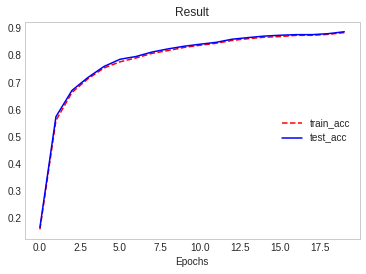

In [ ]:
plt.plot(np.arange(1000//50), train_acc_list, 'r--', label = 'train_acc')
plt.plot(np.arange(1000//50), test_acc_list, 'b', label = 'test_acc')

plt.title('Result')
plt.xlabel('Epochs')
plt.legend(loc = 5)
plt.grid()
plt.show()

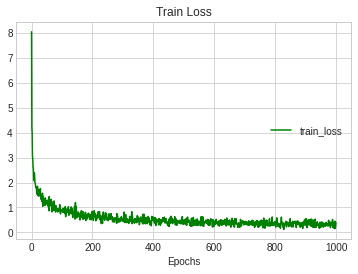

In [ ]:
plt.plot(np.arange(1000), train_loss_list, 'green', label = 'train_loss')
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.legend(loc = 5)
plt.show()